In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv("C:/Users/Usuario/Documents/Excelsius/word_count/out/last_target.csv")

In [3]:
ds

,content_join,score,appVersion,at,label,target,last_target
0,buena,5,3.31.2,2024-11-06 21:59:58,4 stars,Positivo,Positivo
1,buen servicio,5,3.30.0,2024-11-06 21:46:29,5 stars,Positivo,Positivo
2,excelente,5,3.27.0,2024-11-06 21:40:41,5 stars,Positivo,Positivo
3,rapido efectivo aspectos,5,3.31.2,2024-11-06 21:39:22,5 stars,Positivo,Positivo
4,app buena solo malo mas actualizaciones consta...,5,NaN,2024-11-06 21:34:35,3 stars,Neutral,Negativo
...,...,...,...,...,...,...,...
120783,mala app registrarme aparece ups inconveniente...,1,1.87.81,2020-11-09 02:01:18,1 star,Negativo,Negativo
120784,fea app,1,1.87.81,2020-11-09 01:56:06,1 star,Negativo,Negativo
120785,hola dia hoy descarga aplicacion registre fina...,1,1.87.81,2020-11-09 01:46:15,1 star,Negativo,Negativo
120786,pesima hoy no 2020 no da pide confirmar ident...,1,1.87.81,2020-11-09 00:13:25,1 star,Negativo,Negativo


In [4]:
ds2 = ds[['content_join', 'appVersion', 'at', 'last_target']]

In [5]:
ds2.rename(columns={'content_join': 'reviews', 'last_target':'label'}, inplace= True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\970525388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2.rename(columns={'content_join': 'reviews', 'last_target':'label'}, inplace= True)


In [6]:
ds2

,reviews,appVersion,at,label
0,buena,3.31.2,2024-11-06 21:59:58,Positivo
1,buen servicio,3.30.0,2024-11-06 21:46:29,Positivo
2,excelente,3.27.0,2024-11-06 21:40:41,Positivo
3,rapido efectivo aspectos,3.31.2,2024-11-06 21:39:22,Positivo
4,app buena solo malo mas actualizaciones consta...,NaN,2024-11-06 21:34:35,Negativo
...,...,...,...,...
120783,mala app registrarme aparece ups inconveniente...,1.87.81,2020-11-09 02:01:18,Negativo
120784,fea app,1.87.81,2020-11-09 01:56:06,Negativo
120785,hola dia hoy descarga aplicacion registre fina...,1.87.81,2020-11-09 01:46:15,Negativo
120786,pesima hoy no 2020 no da pide confirmar ident...,1.87.81,2020-11-09 00:13:25,Negativo


In [7]:
#ds2.to_csv('../out/model_yape_target_star.csv', index=False)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\563465328.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_negatives = subset.set_index('at').resample('M').size()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\563465328.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


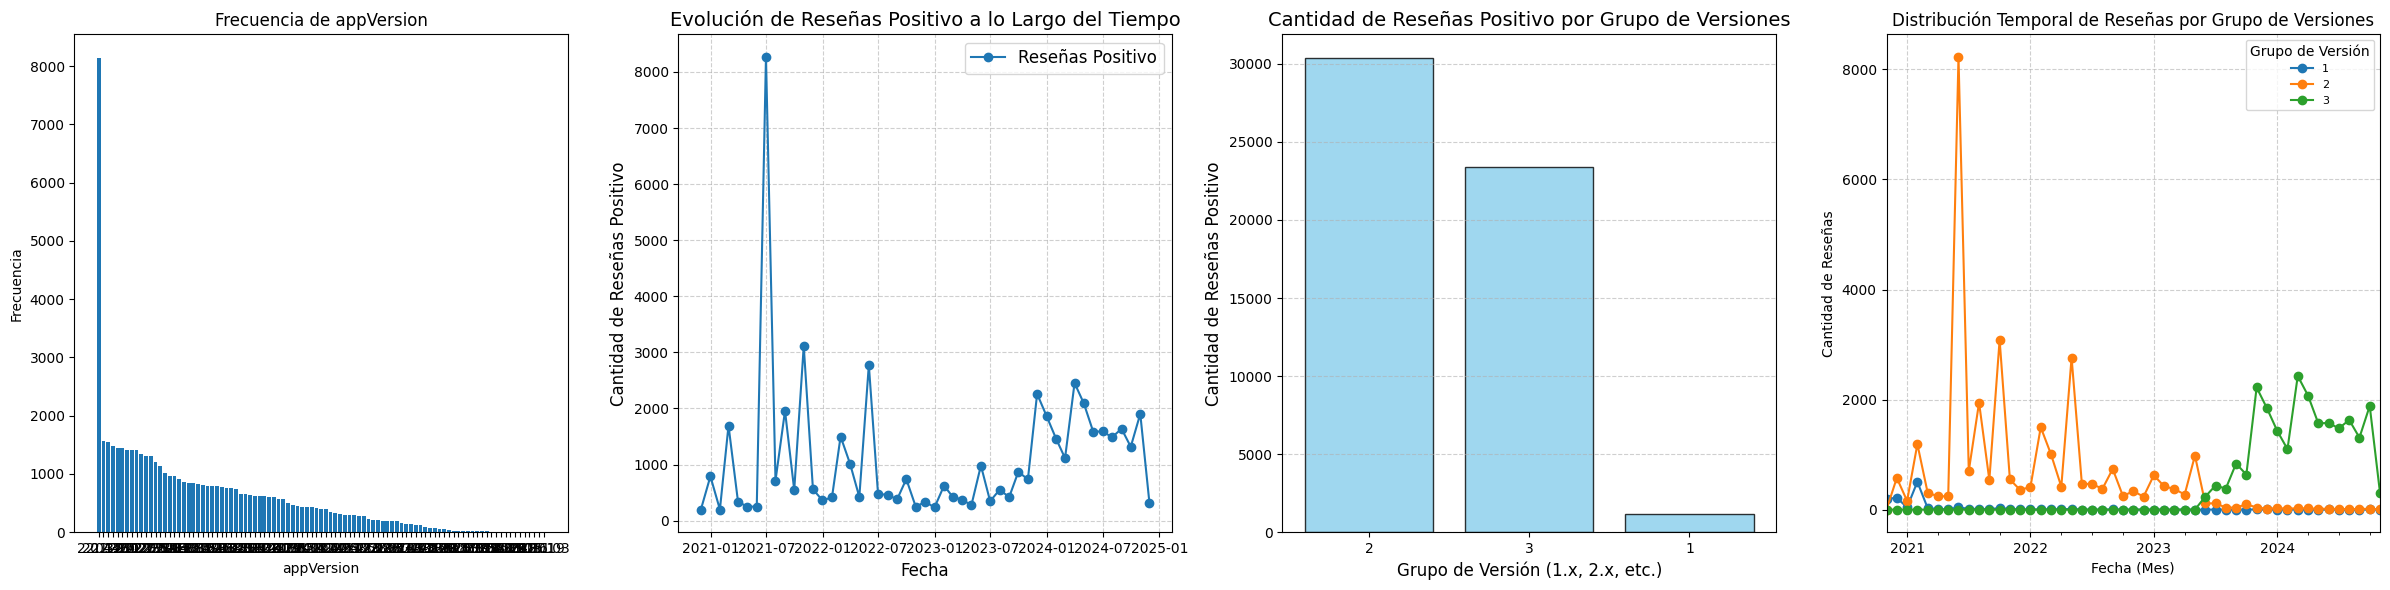

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\563465328.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_negatives = subset.set_index('at').resample('M').size()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\563465328.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


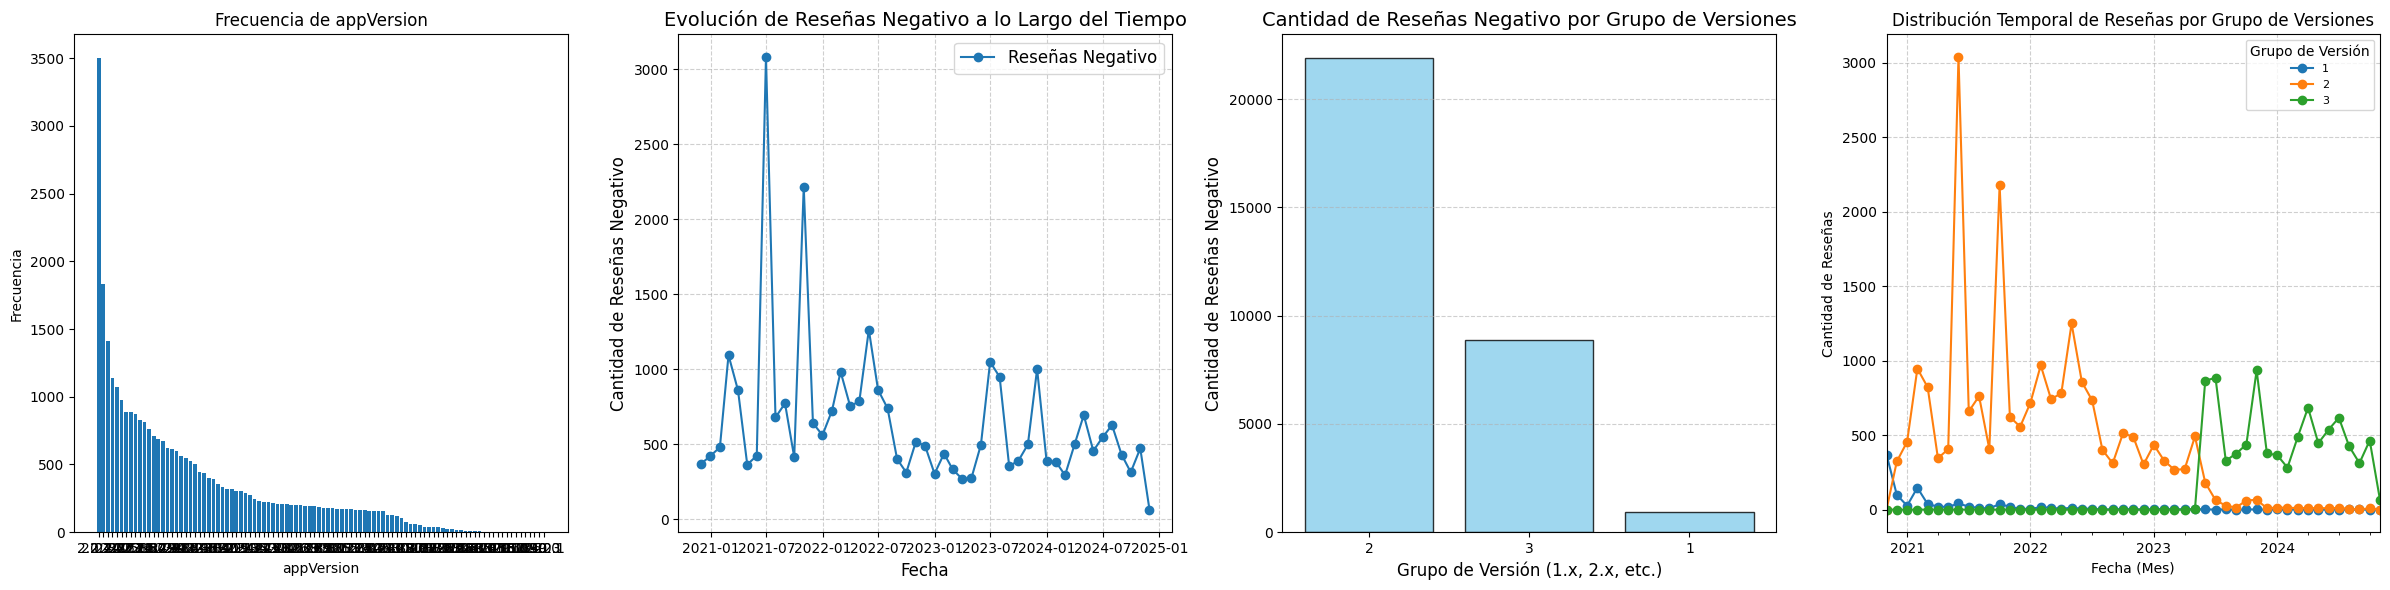

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\563465328.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_negatives = subset.set_index('at').resample('M').size()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\563465328.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


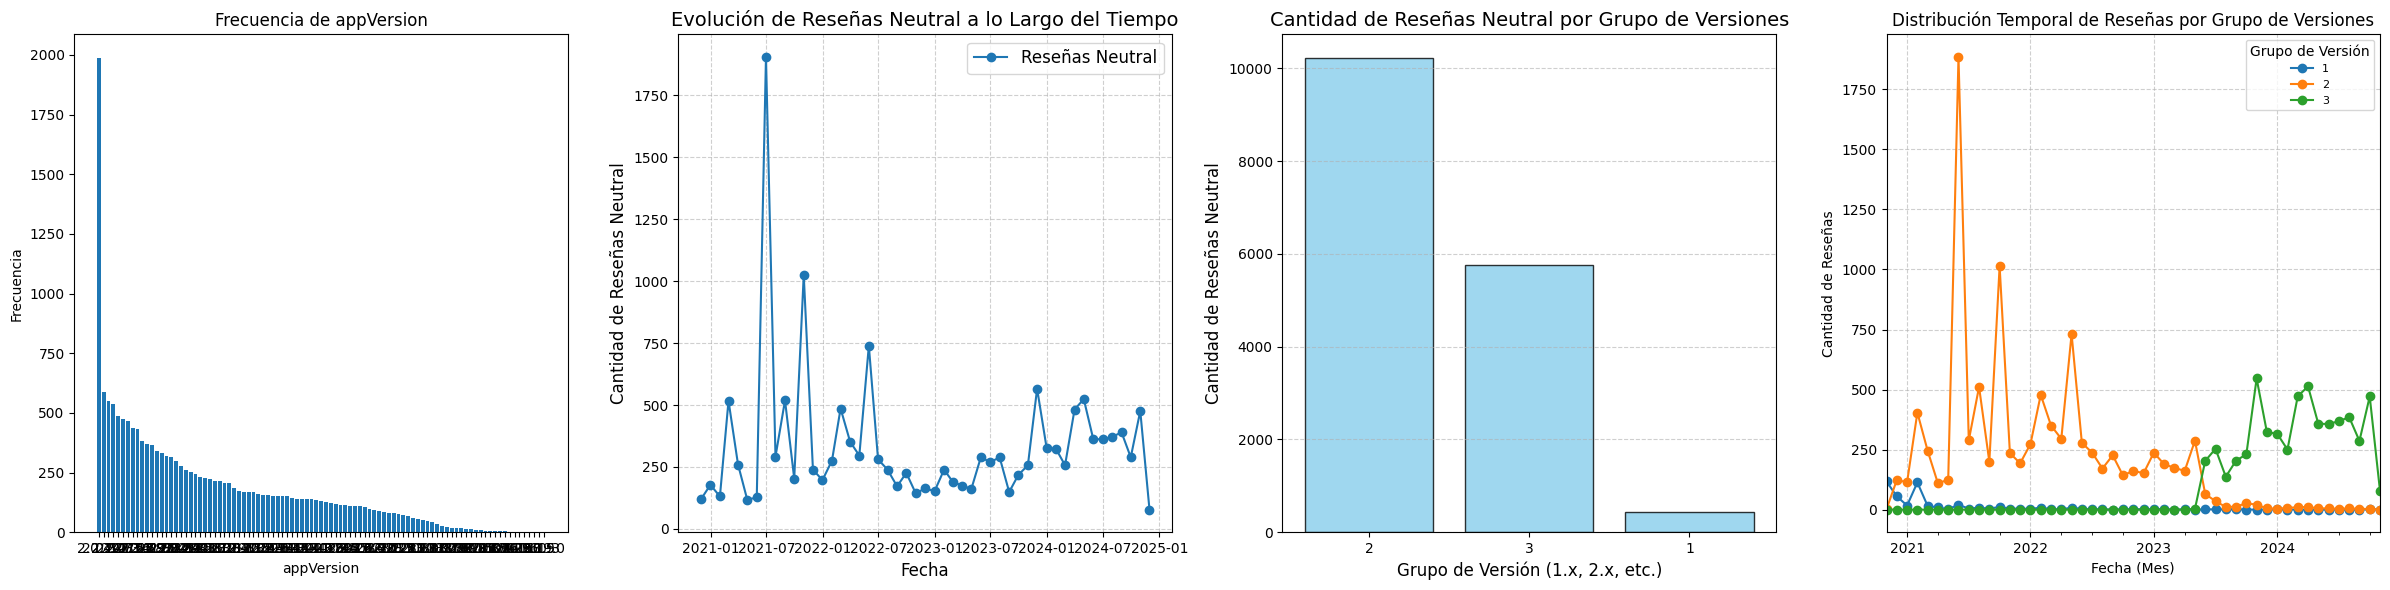

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que 'ds2' es tu DataFrame

labels = ds2['label'].unique()
for i in labels:
    ########################################################################################
    subset = ds2[ds2["label"] == i]
    subset = subset.dropna()
    subset = subset.sort_values(
        by='appVersion', ascending=True)
    subset = subset.reset_index(drop=True)
    app_version_counts = subset['appVersion'].value_counts()

    fig, axs = plt.subplots(1, 4, figsize=(24, 6), constrained_layout=True)

    axs[0].bar(app_version_counts.index, app_version_counts.values)
    axs[0].set_title('Frecuencia de appVersion')
    axs[0].set_xlabel('appVersion')
    axs[0].set_ylabel('Frecuencia')

    ########################################################################################
    subset['at'] = pd.to_datetime(subset['at'])
    monthly_negatives = subset.set_index('at').resample('M').size()

    axs[1].plot(monthly_negatives.index, monthly_negatives.values,
                marker='o', label=f'Reseñas {i}')
    axs[1].set_title(
        f'Evolución de Reseñas {i} a lo Largo del Tiempo', fontsize=14)
    axs[1].set_xlabel('Fecha', fontsize=12)
    axs[1].set_ylabel(f'Cantidad de Reseñas {i}', fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.6)
    axs[1].legend(fontsize=12)

    ########################################################################################
    subset['version_group'] = subset['appVersion'].str.split(
        '.').str[0]

    version_groups = subset.groupby(
        'version_group').size().sort_values(ascending=False)

    axs[2].bar(version_groups.index, version_groups.values,
               color='skyblue', edgecolor='black', alpha=0.8)
    axs[2].set_title(
        f'Cantidad de Reseñas {i} por Grupo de Versiones', fontsize=14)
    axs[2].set_xlabel('Grupo de Versión (1.x, 2.x, etc.)', fontsize=12)
    axs[2].set_ylabel(f'Cantidad de Reseñas {i}', fontsize=12)
    axs[2].grid(axis='y', linestyle='--', alpha=0.6)

    ########################################################################################
    temporal_version_group = subset.groupby(
        [subset['at'].dt.to_period('M'), 'version_group']).size().unstack(fill_value=0)
    temporal_version_group.plot(
        ax=axs[3], kind='line', marker='o', linewidth=1.5)
    axs[3].set_title(
        'Distribución Temporal de Reseñas por Grupo de Versiones', fontsize=12)
    axs[3].set_xlabel('Fecha (Mes)', fontsize=10)
    axs[3].set_ylabel('Cantidad de Reseñas', fontsize=10)
    axs[3].legend(title='Grupo de Versión', fontsize=8)
    axs[3].grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    ########################################################################################

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4580\1918662587.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_negatives = subset_negatives.set_index('at').resample('M').size()


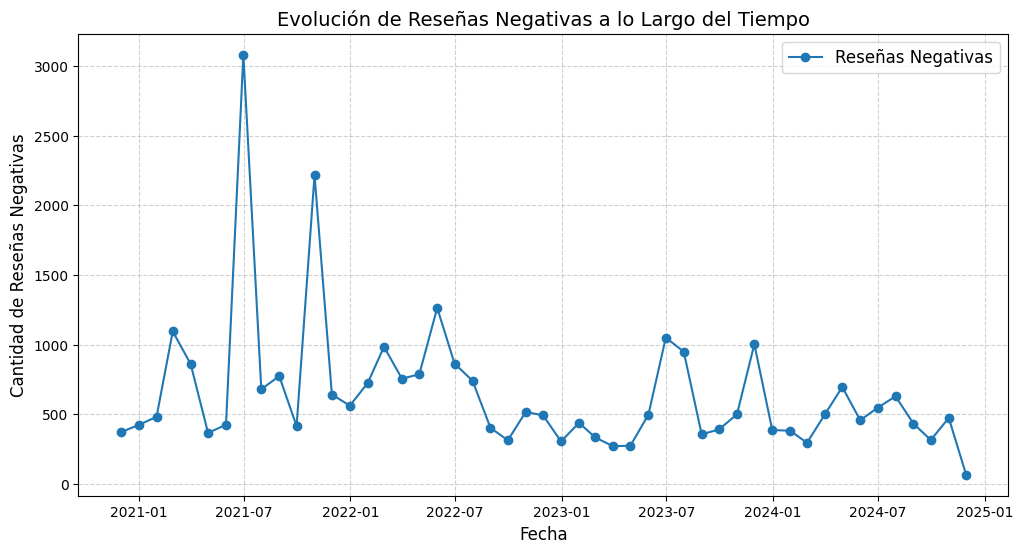

In [9]:
subset_negatives = ds2[ds2["label"] == "Negativo"]
subset_negatives = subset_negatives.dropna()
subset_negatives = subset_negatives.sort_values(
    by='appVersion', ascending=True)
subset_negatives = subset_negatives.reset_index(drop=True)
app_version_counts = subset['appVersion'].value_counts()

subset_negatives['at'] = pd.to_datetime(subset_negatives['at'])
monthly_negatives = subset_negatives.set_index('at').resample('M').size()
plt.figure(figsize=(12, 6))
plt.plot(monthly_negatives.index, monthly_negatives.values,
         marker='o', label='Reseñas Negativas')
plt.title('Evolución de Reseñas Negativas a lo Largo del Tiempo', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Reseñas Negativas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

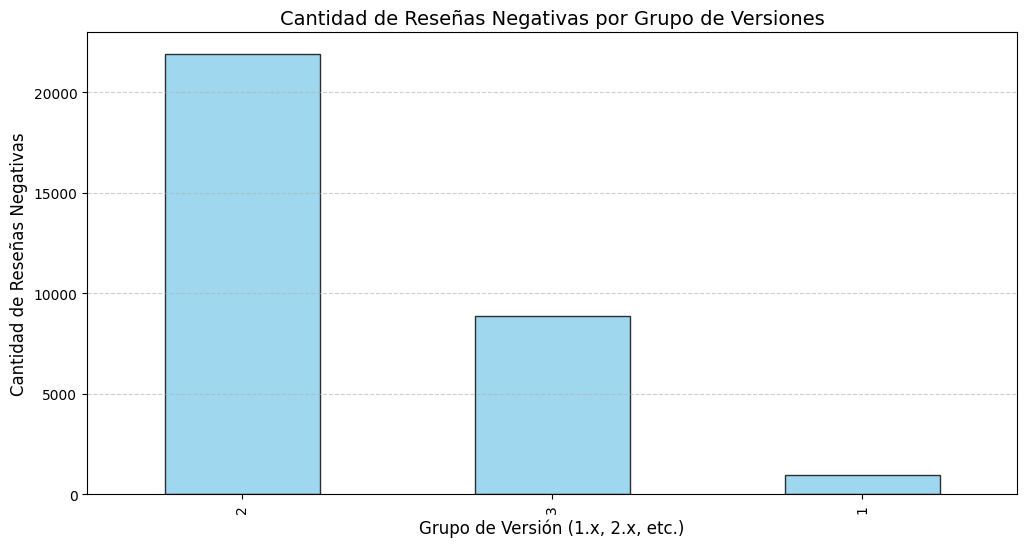

In [10]:
subset_negatives['version_group'] = subset_negatives['appVersion'].str.split(
    '.').str[0]

version_groups = subset_negatives.groupby(
    'version_group').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
version_groups.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Cantidad de Reseñas Negativas por Grupo de Versiones', fontsize=14)
plt.xlabel('Grupo de Versión (1.x, 2.x, etc.)', fontsize=12)
plt.ylabel('Cantidad de Reseñas Negativas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1400x800 with 0 Axes>

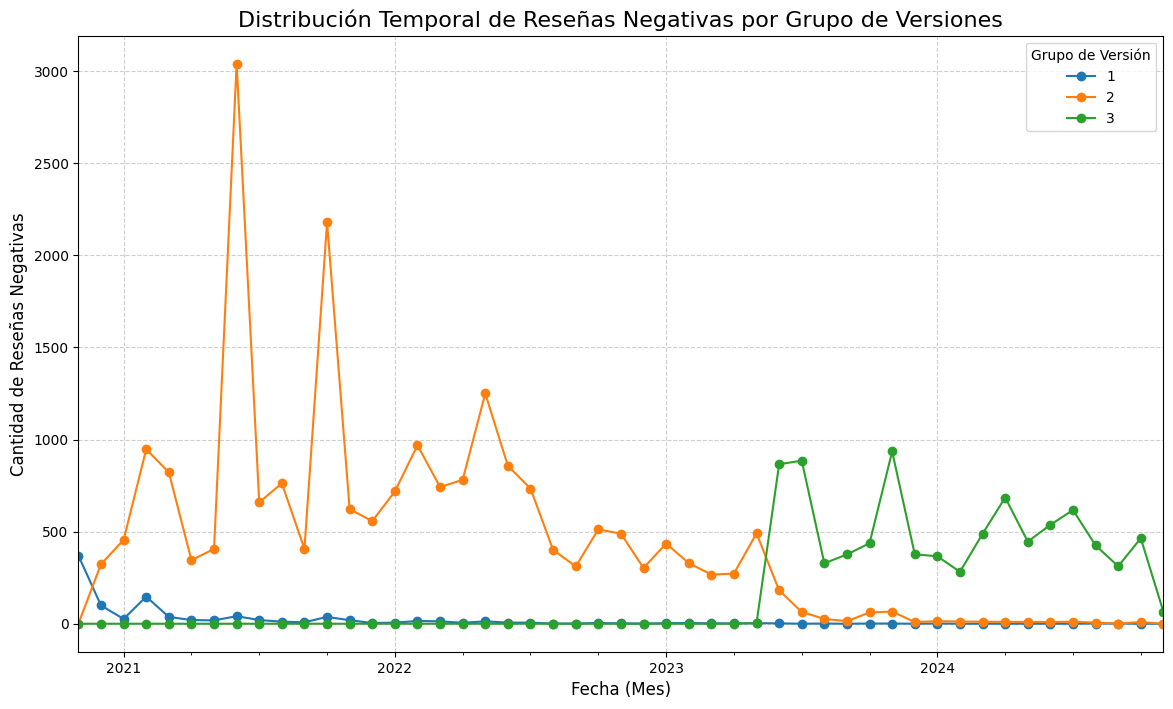

In [11]:
temporal_version_group = subset_negatives.groupby(
    [subset_negatives['at'].dt.to_period('M'), 'version_group']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
temporal_version_group.plot(
    kind='line', figsize=(14, 8), marker='o', linewidth=1.5)
plt.title(
    'Distribución Temporal de Reseñas Negativas por Grupo de Versiones', fontsize=16)
plt.xlabel('Fecha (Mes)', fontsize=12)
plt.ylabel('Cantidad de Reseñas Negativas', fontsize=12)
plt.legend(title='Grupo de Versión', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()